In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/all-nobel-laureates-1901-present/nobel_latest.csv


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("../input/all-nobel-laureates-1901-present/nobel_latest.csv")
df.head(5)

,Year,Laureate_Id,Firstname,Lastname,Category,Gender,Prize_Share,Motivation,Birth_Date,Birth_Country,Birth_City,Birth_Country_Code,Death_Date,Death_Country,Death_City,Death_Country_Code,Organization_Name,Organization_City,Organization_Country
0,1901,1,Wilhelm Conrad,Röntgen,physics,male,1,"""in recognition of the extraordinary services ...",1845-03-27,Prussia (now Germany),Lennep (now Remscheid),DE,10-02-1923,Germany,Munich,DE,Munich University,Munich,Germany
1,1901,293,Emil,von Behring,medicine,male,1,"""for his work on serum therapy especially its ...",1854-03-15,Prussia (now Poland),Hansdorf (now Lawice),PL,31-03-1917,Germany,Marburg,DE,Marburg University,Marburg,Germany
2,1901,462,Henry,Dunant,peace,male,2,"""for his humanitarian efforts to help wounded ...",1828-05-08,Switzerland,Geneva,CH,30-10-1910,Switzerland,Heiden,CH,NaN,NaN,NaN
3,1901,463,Frédéric,Passy,peace,male,2,"""for his lifelong work for international peace...",1822-05-20,France,Paris,FR,12-06-1912,France,Paris,FR,NaN,NaN,NaN
4,1901,569,Sully,Prudhomme,literature,male,1,"""in special recognition of his poetic composit...",1839-03-16,France,Paris,FR,07-09-1907,France,Châtenay,FR,NaN,NaN,NaN


In [4]:
df.columns

Index(['Year', 'Laureate_Id', 'Firstname', 'Lastname', 'Category', 'Gender',
       'Prize_Share', 'Motivation', 'Birth_Date', 'Birth_Country',
       'Birth_City', 'Birth_Country_Code', 'Death_Date', 'Death_Country',
       'Death_City', 'Death_Country_Code', 'Organization_Name',
       'Organization_City', 'Organization_Country'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  989 non-null    int64 
 1   Laureate_Id           989 non-null    int64 
 2   Firstname             989 non-null    object
 3   Lastname              957 non-null    object
 4   Category              989 non-null    object
 5   Gender                989 non-null    object
 6   Prize_Share           989 non-null    int64 
 7   Motivation            989 non-null    object
 8   Birth_Date            989 non-null    object
 9   Birth_Country         958 non-null    object
 10  Birth_City            956 non-null    object
 11  Birth_Country_Code    958 non-null    object
 12  Death_Date            989 non-null    object
 13  Death_Country         646 non-null    object
 14  Death_City            640 non-null    object
 15  Death_Country_Code    646 non-null    ob

In [6]:
df.describe

<bound method NDFrame.describe of      Year  Laureate_Id       Firstname     Lastname    Category  Gender  \
0    1901            1  Wilhelm Conrad      Röntgen     physics    male   
1    1901          293            Emil  von Behring    medicine    male   
2    1901          462           Henry       Dunant       peace    male   
3    1901          463        Frédéric        Passy       peace    male   
4    1901          569           Sully    Prudhomme  literature    male   
..    ...          ...             ...          ...         ...     ...   
984  2022         1011          Svante        Pääbo    medicine    male   
985  2022          743           Barry    Sharpless   chemistry    male   
986  2022         1022         Douglas      Diamond   economics    male   
987  2022         1015         Carolyn     Bertozzi   chemistry  female   
988  2022         1023          Philip       Dybvig   economics    male   

     Prize_Share                                         Motivati

### Count the number of Nobel laureates by category

In [7]:
category_counts=df["Category"].value_counts()
category_counts

medicine      225
physics       222
chemistry     191
peace         140
literature    119
economics      92
Name: Category, dtype: int64

### Count the number of Nobel laureates by gender

In [8]:
gender_counts=df["Gender"].value_counts()
gender_counts

male      898
female     61
org        30
Name: Gender, dtype: int64

### Find the earliest and latest years in the dataset


In [9]:
earliest_year=df["Year"].min()
latest_year=df["Year"].max()
print("The earliest year in the data set is: {}".format(earliest_year))
print("The latest year in the data set is: {}".format(latest_year))

The earliest year in the data set is: 1901
The latest year in the data set is: 2022


### Nobel laureates born in Sweden

In [10]:
df["Birth_Country"].head(20)

0           Prussia (now Germany)
1            Prussia (now Poland)
2                     Switzerland
3                          France
4                          France
5                 the Netherlands
6           Prussia (now Germany)
7         Schleswig (now Germany)
8                     Switzerland
9                     Switzerland
10                the Netherlands
11                          India
12                the Netherlands
13                         France
14                 United Kingdom
15                         France
16    Russian Empire (now Poland)
17        Faroe Islands (Denmark)
18                         Norway
19                         Sweden
Name: Birth_Country, dtype: object

In [11]:
born_in_sweden=df[df["Birth_Country"]=="Sweden"]
born_in_sweden

,Year,Laureate_Id,Firstname,Lastname,Category,Gender,Prize_Share,Motivation,Birth_Date,Birth_Country,Birth_City,Birth_Country_Code,Death_Date,Death_Country,Death_City,Death_Country_Code,Organization_Name,Organization_City,Organization_Country
19,1903,162,Svante,Arrhenius,chemistry,male,1,"""in recognition of the extraordinary services ...",1859-02-19,Sweden,Vik,SE,02-10-1927,Sweden,Stockholm,SE,Stockholm University,Stockholm,Sweden
48,1908,473,Klas Pontus,Arnoldson,peace,male,2,"""for their long time work for the cause of pea...",1844-10-27,Sweden,Gothenburg,SE,20-02-1916,Sweden,Stockholm,SE,NaN,NaN,NaN
52,1909,579,Selma,Lagerlöf,literature,female,1,"""in appreciation of the lofty idealism vivid i...",1858-11-20,Sweden,Mårbacka,SE,16-03-1940,Sweden,Mårbacka,SE,NaN,NaN,NaN
67,1911,305,Allvar,Gullstrand,medicine,male,1,"""for his work on the dioptrics of the eye""",1862-06-05,Sweden,Landskrona,SE,28-07-1930,Sweden,Stockholm,SE,Uppsala University,Uppsala,Sweden
72,1912,17,Gustaf,Dalén,physics,male,1,"""for his invention of automatic regulators for...",1869-11-30,Sweden,Stenstorp,SE,09-12-1937,Sweden,Stockholm,SE,Swedish Gas-Accumulator Co.,Lidingö Stockholm,Sweden
86,1916,585,Verner,von Heidenstam,literature,male,1,"""in recognition of his significance as the lea...",1859-07-06,Sweden,Olshammar,SE,20-05-1940,Sweden,Övralid,SE,NaN,NaN,NaN
103,1921,485,Hjalmar,Branting,peace,male,2,"""for their lifelong contributions to the cause...",1860-11-23,Sweden,Stockholm,SE,24-02-1925,Sweden,Stockholm,SE,NaN,NaN,NaN
120,1924,29,Manne,Siegbahn,physics,male,1,"""for his discoveries and research in the field...",1886-12-03,Sweden,Örebro,SE,26-09-1978,Sweden,Stockholm,SE,Uppsala University,Uppsala,Sweden
132,1926,183,The,Svedberg,chemistry,male,1,"""for his work on disperse systems""",1884-08-30,Sweden,Fleräng,SE,25-02-1971,Sweden,Örebro,SE,Uppsala University,Uppsala,Sweden
154,1930,495,Nathan,Söderblom,peace,male,1,"""for promoting Christian unity and helping cre...",1866-01-15,Sweden,Trönö,SE,12-07-1931,Sweden,Uppsala,SE,NaN,NaN,NaN


### Display the laureates and their corresponding age at the time of receiving the Nobel Prize.

In [12]:
df["Birth_Date"].dropna()
df["Year"].dropna()
df["Birth_Date"]=pd.to_datetime(df["Birth_Date"],errors="coerce")
df["Year"]=pd.to_datetime(df["Year"],format='%Y')
df["Age_Getting_Prise"]= ((df["Year"]-df["Birth_Date"]).dt.days//365.25)
df[["Firstname","Lastname","Age_Getting_Prise","Gender"]]


/tmp/ipykernel_20/2673452925.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Birth_Date"]=pd.to_datetime(df["Birth_Date"],errors="coerce")


,Firstname,Lastname,Age_Getting_Prise,Gender
0,Wilhelm Conrad,Röntgen,55.0,male
1,Emil,von Behring,46.0,male
2,Henry,Dunant,72.0,male
3,Frédéric,Passy,78.0,male
4,Sully,Prudhomme,61.0,male
...,...,...,...,...
984,Svante,Pääbo,66.0,male
985,Barry,Sharpless,80.0,male
986,Douglas,Diamond,68.0,male
987,Carolyn,Bertozzi,55.0,female


### Create a histogram to visualize the age distribution

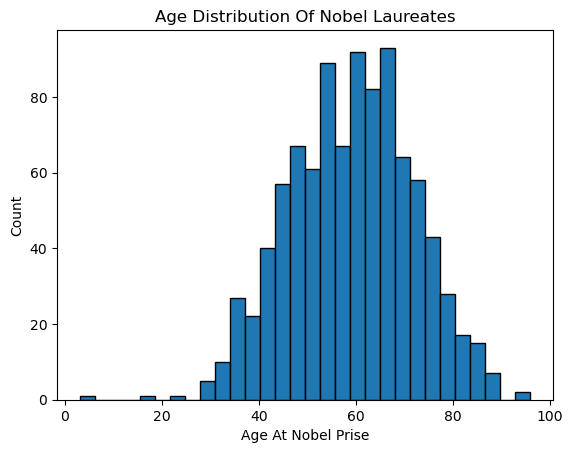

In [13]:
plt.hist(df["Age_Getting_Prise"],bins=30,edgecolor="black")
plt.xlabel("Age At Nobel Prise")
plt.ylabel("Count")
plt.title("Age Distribution Of Nobel Laureates")
plt.show()

### Create a boxplot to show the age distribution by country.

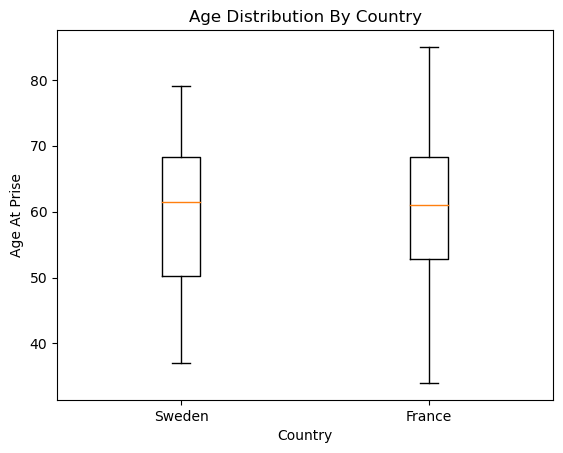

In [14]:
plt.boxplot([df[df['Birth_Country'] == 'Sweden']['Age_Getting_Prise'],
               df[df['Birth_Country'] == 'France']['Age_Getting_Prise']],
            labels=['Sweden','France'])
plt.xlabel("Country")
plt.ylabel("Age At Prise")
plt.title("Age Distribution By Country")
plt.show()



### Create a bar chart to show the number of laureates by category.

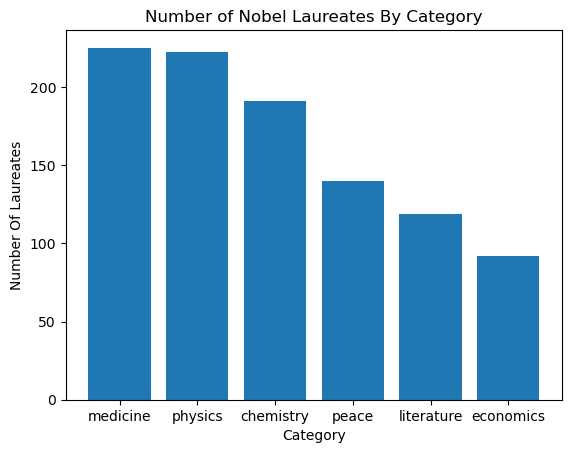

In [15]:
plt.bar(category_counts.index,category_counts.values)
plt.xlabel("Category")
plt.ylabel("Number Of Laureates")
plt.title("Number of Nobel Laureates By Category")
plt.show()

###  Create a line plot to show the trend of average age over the years.

In [16]:
average_age_by_year= df.groupby("Year")["Age_Getting_Prise"].mean()
average_age_by_year

Year
1901-01-01    60.000000
1902-01-01    55.285714
1903-01-01    51.000000
1904-01-01    62.000000
1905-01-01    58.200000
                ...    
2018-01-01    69.636364
2019-01-01    65.428571
2020-01-01    69.500000
2021-01-01    65.888889
2022-01-01    70.181818
Name: Age_Getting_Prise, Length: 119, dtype: float64

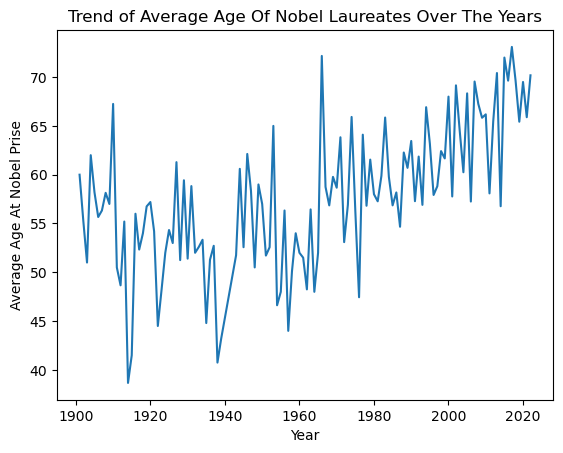

In [17]:
plt.plot(average_age_by_year.index, average_age_by_year.values)
plt.xlabel("Year")
plt.ylabel("Average Age At Nobel Prise")
plt.title("Trend of Average Age Of Nobel Laureates Over The Years")
plt.show()